In [ ]:
# Importando pacotes necessários
import pandas as pd
import numpy as np
import math #fornece funções matemáticas e constantes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # calcula o error do modelo
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Inicialmente realizaremos a importação das bibliotecas necessárias para o
projeto, grande parte destas bibliotecas e recorrente em diversos outros projetos, sendo assim não necessitam de uma explicação aprofundada.

    sklearn.model_selection 'import'train_test_split
Essa função vai dividir um conjunto de dados em partes de treinamento e teste, essencial para validar o desempenho do modelo

    sklearn.linear_model import LinearRegression
Essa função importa a classe LinearRegression da biblioteca Scikit-learn, que é usada para construir e treinar modelos de regressão linear.

    sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 Essa função vai importa métricas de avaliação para modelos de aprendizado de máquina, sendo estas as seguintes metricas utilizadas:

  * "mean_squared_error" ( Calcula o erro quadrático média).

  * "mean_absolute_error" (Calcula o erro absoluto médio, que mede a diferença média absoluta entre os valores reais e previstos).

  * "r2_score" (Determina o coeficiente de determinação, que indica o quão bem o modelo explica a variabilidade dos dados).

          import seaborn as sns
Essa função importa o pacote seaborn, uma biblioteca de visualização, Ela fornece ferramentas para criar gráficos estatísticos visualmente atraentes e fáceis de interpretar.

                import warnings
 Essa função permite controlar alertas e mensagens de aviso emitidas pelo Python.

In [ ]:
df = pd.read_csv('Energy_consumption_dataset.csv')
df_copy = df.copy()

Aqui carregaremos o arquivo CSV que possui os dados que serão utilizados no projeto chamado Energy_consumption_dataset.csv em um DataFrame do pandas, chamado df.

        df_copy = df.copy()
 Essa parte criara uma copia do dataFrame df com o nome de df.copy.

       df.head(5)
O metodo head e utilizado para exibir as primeiras 5 linhas do dataFrame df.

In [ ]:
df.head(5)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


## Análise exploratória dos dados (EDA)

### MAPEAMENTOS DOS DADOS:
O objetivo é transformar as variaveis em formato de texto em numero para colocar no modelo de predição

In [ ]:
# Mapeamento dos dias para valores numéricos
day_mapping = {
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7,
    'Sunday': 1
}

df_copy['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)
df_copy['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})
df_copy['HVACUsage']= df['HVACUsage'].map({'On': 1, 'Off': 0})
df_copy['LightingUsage']= df['LightingUsage'].map({'On': 1, 'Off': 0})
df_copy

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,7,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,1,1,7,0,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,1,2,7,0,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,1,3,7,0,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,1,4,7,0,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,1,1,26.338718,52.580000,1563.567259,7,1,1,20.591717,70.270344
4996,12,17,2,0,20.007565,42.765607,1999.982252,5,0,1,7.536319,73.943071
4997,12,13,5,1,26.226253,30.015975,1999.982252,5,0,1,28.162193,85.784613
4998,12,8,7,1,24.673206,50.223939,1240.811298,2,1,1,20.918483,63.784001


 Nessa parte foi utilizada a função Day_mapping que vai realizar uma associação do nome dos dias com um valor numerico.

      df_copy['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)
essa função vai criar uma nova coluna no DataFrame "df_copy" com o nome 'DayOfWeek', sendo essa coluna derivada da coluna 'DayOfWeek' do DataFrame "df"

  * A função map(day_mapping) vai substituir o valores do 'DayOfWeek' para os valores numericos que foram definidos no day_mapping.


    df_copy['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

Essa função Cria uma nova coluna chamada 'Holiday' no DataFrame df_copy.

*   O método map({'Yes': 1, 'No': 0}) converte valores categóricos da coluna 'Holiday' de df:

* 'Yes' é mapeado para 1 (feriado).

*  'No' é mapeado para 0 (dia útil).

       df_copy['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})

Cria uma coluna chamada 'HVACUsage' no DataFrame df_copy e essa nova coluna contém valores numéricos, representando o status do sistema HVAC.

    df_copy['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
 Cria uma coluna chamada 'LightingUsage' no DataFrame df_copy e essa coluna contém valores numéricos, representando o status do uso de iluminação.


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   int64  
 3   Holiday            5000 non-null   int64  
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   int64  
 9   LightingUsage      5000 non-null   int64  
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 468.9 KB


      df_copy.info()
 exibe informações resumidas sobre o DataFrame df_copy.

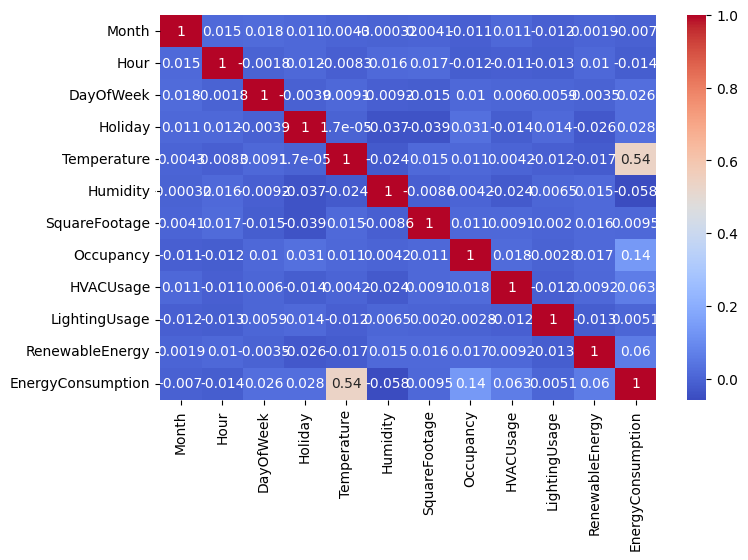

In [ ]:
plt.figure(figsize=(8, 5))  # Largura = 12, Altura = 8 (ajuste como desejar)
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm")
plt.show()

    sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm")
Cria um mapa de calor da matriz de correlação do DataFrame df_copy usando o Seaborn.

Os dados de correlação entre as colunas numéricas do DataFrame variam de -1 a 1:
  * Valores próximos a 1 indicam uma forte correlação positiva.
  * Valores próximos a -1 indicam uma forte correlação negativa.
  * Valores próximos a 0 indicam pouca ou nenhuma correlação.

In [ ]:
df_copy = df_copy.drop(columns=['RenewableEnergy', 'HVACUsage', 'SquareFootage' , 'Humidity'])  # apagando essas colunas

Essa linha de codigo apaga colunas que possuem pouca correlação para facilitar a analise dos dados tendo assim maior precissão na previsão

In [ ]:
df_copy

,Month,Hour,DayOfWeek,Holiday,Temperature,Occupancy,LightingUsage,EnergyConsumption
0,1,0,7,0,25.139433,5,0,75.364373
1,1,1,7,0,27.731651,1,1,83.401855
2,1,2,7,0,28.704277,2,0,78.270888
3,1,3,7,0,20.080469,1,1,56.519850
4,1,4,7,0,23.097359,9,0,70.811732
...,...,...,...,...,...,...,...,...
4995,12,6,1,1,26.338718,7,1,70.270344
4996,12,17,2,0,20.007565,5,1,73.943071
4997,12,13,5,1,26.226253,5,1,85.784613
4998,12,8,7,1,24.673206,2,1,63.784001


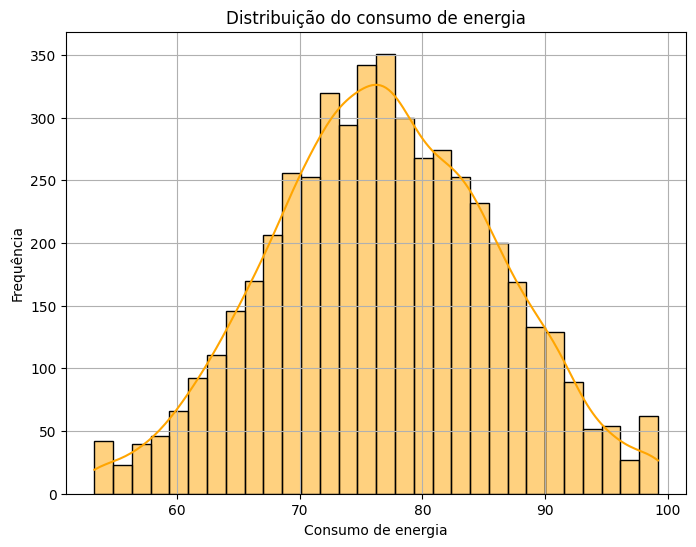

In [ ]:
# Plotar a distribuição do consumo de energia
if 'EnergyConsumption' in df_copy.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_copy['EnergyConsumption'], kde=True, color='orange', bins=30)
    plt.title('Distribuição do consumo de energia')
    plt.xlabel('Consumo de energia')
    plt.ylabel('Frequência')
    plt.grid()
    plt.show()

    if 'EnergyConsumption' in df_copy.columns:
Verifica se a colona "EnergyConsumption" existe em df_copy


    sns.histplot(df_copy['EnergyConsumption'], kde=True, color='orange', bins=30)

  * **sns.histplot:** Cria o histograma com as seguintes características:

  * **kde=True:** Adiciona uma curva de densidade kernel (Kernel Density Estimation) sobreposta ao histograma, representando a distribuição suavizada.

  * **color='orange':** Define a cor das barras do histograma e da curva.

  * **bins=30:** Divide os dados em 30 intervalos (barras do histograma).

  gráfico mostra a distribuição dos dados de consumo de energia


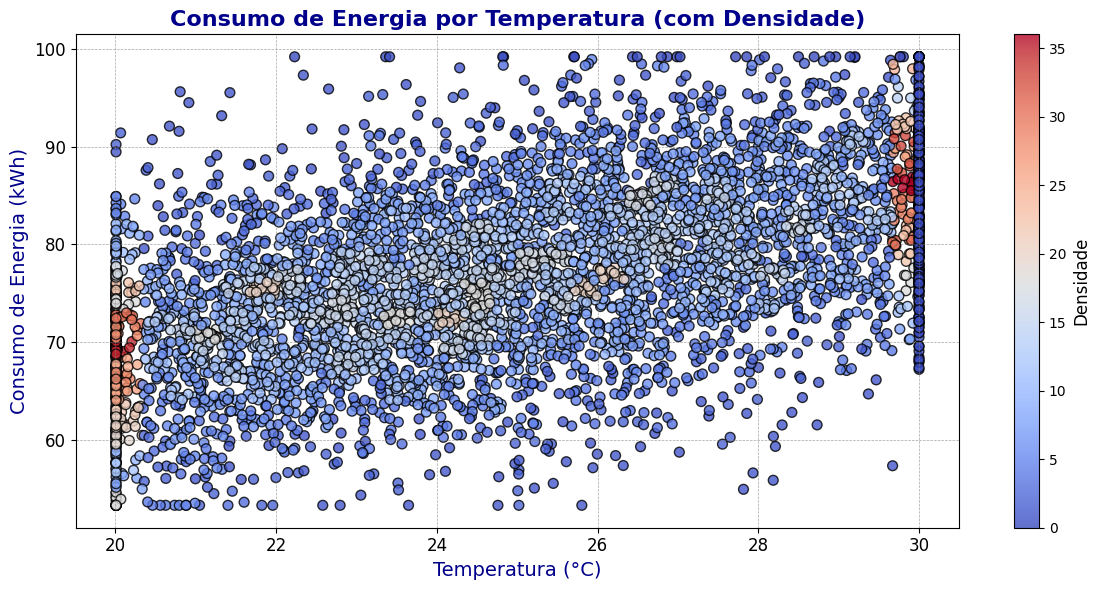

In [ ]:


# Supõe-se que 'df_copy' tenha colunas 'Temperature' e 'EnergyConsumption'

# Criar uma grade de densidade (usando histograma bidimensional para calcular concentrações)
x = df_copy['Temperature']
y = df_copy['EnergyConsumption']
bins = 30  # Número de divisões para calcular concentrações

# Calcular a densidade dos pontos
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
xidx = np.digitize(x, xedges)
yidx = np.digitize(y, yedges)

# Criar um DataFrame com a densidade associada a cada ponto
df_copy['Density'] = [heatmap[xi - 1, yi - 1] if 0 < xi <= bins and 0 < yi <= bins else 0
                      for xi, yi in zip(xidx, yidx)]

# Configurando o gráfico
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x, y,
    c=df_copy['Density'],  # Cor baseada na densidade
    cmap='coolwarm',  # Paleta de cores
    s=50,  # Tamanho dos pontos
    alpha=0.8,  # Transparência
    edgecolor='black'
)

# Adicionar barra de cor para indicar densidade
cbar = plt.colorbar(scatter)
cbar.set_label('Densidade', fontsize=12)

# Adicionando título e rótulos
plt.title('Consumo de Energia por Temperatura (com Densidade)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Temperatura (°C)', fontsize=14, color='darkblue')
plt.ylabel('Consumo de Energia (kWh)', fontsize=14, color='darkblue')

# Ajustando o layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrando o gráfico
plt.tight_layout()
plt.show()


19. Inicialmente é definido variáveis x e y para representar as colunas '**Temperature**' e '**EnergyConsumption**' do DataFrame df_copy.

  * **bins:** Especifica o número de intervalos usadas no histograma

          heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)

 Esse comando Calcula um histograma usando np.histogram2d


                  xidx = np.digitize(x, xedges)
                  yidx = np.digitize(y, yedges)

Esses comandos determinam a qual intervalo (bin) cada ponto pertence em ambos os eixos.

    df_copy['Density'] = [heatmap[xi - 1, yi - 1] if 0 < xi <= bins and 0 < yi <= bins else 0 for xi, yi in zip(xidx, yidx)]

Esse comando adiciona uma coluna chamada'Density' ao DataFrame df_copy, que associa a densidade de cada ponto baseado na matriz heatmap


                    plt.figure(figsize=(12, 6))
                    scatter = plt.scatter(
                        x, y,
                        c=df_copy['Density'],  # Cor baseada na densidade
                        cmap='coolwarm',  # Paleta de cores
                        s=50,  # Tamanho dos pontos
                        alpha=0.8,  # Transparência
                        edgecolor='black'
                    )
Este comando cria um gráfico de dispersão onde a cor dos pontos representa a densidade:
  * **c=df_copy['Density']:** Define a cor dos pontos com base nos valores de densidade.

  * **cmap='coolwarm':** Define a paleta de cores (tons azulados para baixa densidade e avermelhados para alta densidade).

  * **s=50:** Define o tamanho dos pontos.

  * **alpha=0.8:** Define a transparência para facilitar a visualização.

  * **edgecolor='black':** Adiciona bordas pretas aos pontos para destacá-los.
              cbar = plt.colorbar(scatter)
              cbar.set_label('Densidade', fontsize=12)

Adiciona uma barra de cor ao gráfico para indicar os valores de densidade.


    plt.title('Consumo de Energia por Temperatura (com Densidade)', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('Temperatura (°C)', fontsize=14, color='darkblue')
    plt.ylabel('Consumo de Energia (kWh)', fontsize=14, color='darkblue')

O comando adiciona título e rótulos aos eixos do gráfico, com personalização de tamanho, peso e cor do texto.

      plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

 Adiciona uma grade ao gráfico para facilitar a leitura dos valores.

                    plt.tight_layout()
                    plt.show()

O comando ajusta o layout do gráfico para evitar sobreposição de elementos e exibe o gráfico final.

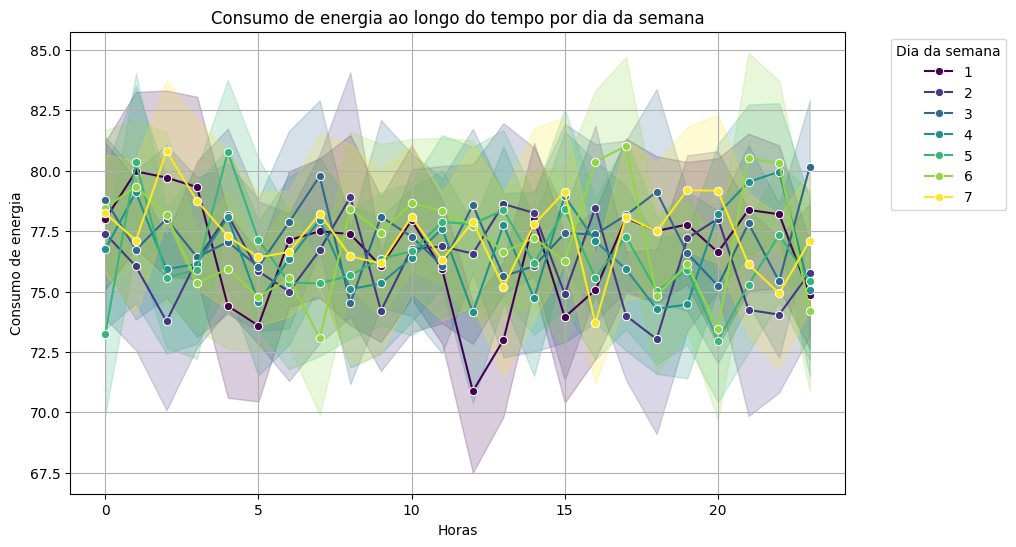

In [ ]:
# Line Plot for Energy Consumption Over Time by Day of Week
if 'DayOfWeek' in df_copy.columns and 'Hour' in df_copy.columns and 'EnergyConsumption' in df_copy.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(df_copy, x=df_copy['Hour'], y=df_copy['EnergyConsumption'], hue=df_copy['DayOfWeek'], palette='viridis', marker='o')
    plt.title('Consumo de energia ao longo do tempo por dia da semana')
    plt.xlabel('Horas')
    plt.ylabel('Consumo de energia')
    plt.legend(title='Dia da semana', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

    sns.lineplot(df_copy, x=df_copy['Hour'], y=df_copy['EnergyConsumption'], hue=df_copy['DayOfWeek'], palette='viridis', marker='o')

  O comando Plota um gráfico de linha usando o Seaborn para mostrar a variação do consumo de energia ao longo das horas, separado por dia da semana.

  * **x=df_copy['Hour']:** Define as horas como o eixo x (variável independente).

  * **y=df_copy['EnergyConsumption']:** Define o consumo de energia como o eixo y (variável dependente).

  * **hue=df_copy['DayOfWeek']:** Adiciona uma distinção de cores com base no dia da semana.

  * **palette='viridis':** Define a paleta de cores para o gráfico.

  * **marker='o':** Adiciona marcadores em cada ponto de dado no gráfico de linha.

  O gráfico mostra a variação do consumo de energia ao longo das horas do dia, separado por dia da semana. Cada linha no gráfico representa um dia da semana


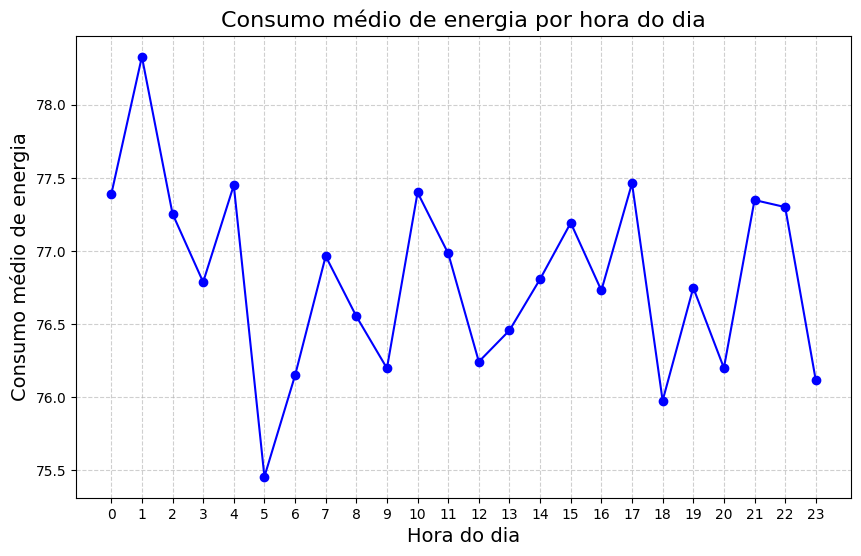

In [ ]:
hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Consumo médio de energia por hora do dia', fontsize=16)
plt.xlabel('Hora do dia', fontsize=14)
plt.ylabel('Consumo médio de energia', fontsize=14)
plt.xticks(range(0, 24))  # Intervalo de horas de 0 a 23
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


    hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

Esse comando agrupa os dados no DataFrame df pela coluna 'Hour' (horas do dia) e calcula a média do consumo de energia para cada hora.

  * **groupby('Hour'):** Agrupa as linhas do DataFrame com base no valor da coluna 'Hour'.

  * **['EnergyConsumption'].mean():** Calcula a média do consumo de energia (EnergyConsumption) para cada grupo.

  * **reset_index():** Reseta o índice criado pelo groupby, transformando o resultado em um novo DataFrame chamado hour_avg_consumption.

        plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')


É gerado um gráfico de linha para mostrar o consumo médio de energia por hora do dia

In [ ]:
df_copy = df_copy.drop(columns=['Density'])

Comando utilizado para apagar a coluna 'Density'

## TREINAMENTO DO MODELO

In [ ]:
X = df_copy.iloc[:,:-1] # selecionar todas as colunas, exceto a ultima
y = df_copy.iloc[:,-1] # selecionar a ultima coluna


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

           X = df_copy.iloc[:,:-1]

Seleciona todas as colunas do DataFrame df_copy, exceto a última coluna.
    
            y = df_copy.iloc[:,-1]

Seleciona apenas a última coluna do DataFrame df_copy, que será usada como a variável que queremos prever.


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Este comando divide os dados em conjuntos de treino e teste, possuindo os Parâmetros:

  * **test_size=0.20:** Define que 20% dos dados serão usados para teste e 80% para treino.

  * **random_state=42:** Garante a reprodutibilidade da divisão ao fixar a semente do gerador aleatório.




In [ ]:
# Criar o modelo de regressão linear
model = LinearRegression()

In [ ]:
# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

Ajusta os coeficientes da regressão para minimizar o erro entre as previsões e os valores reais.

In [ ]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

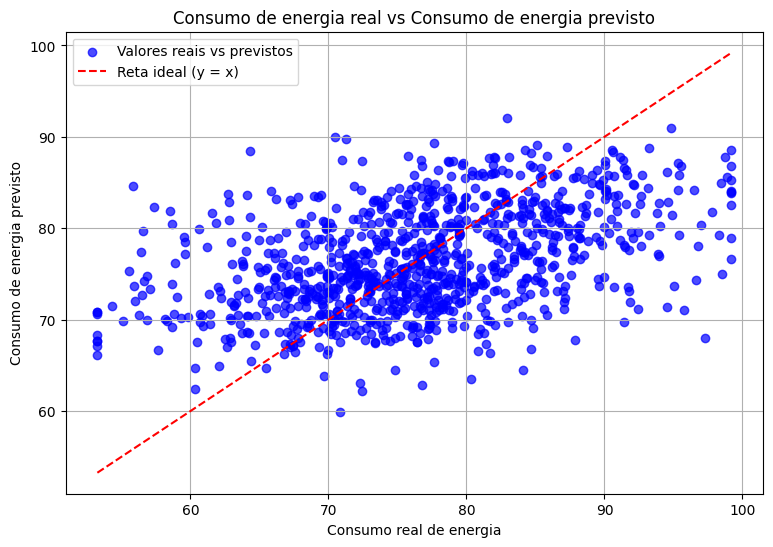

In [ ]:

plt.figure(figsize=(9, 6))

# Gráfico de dispersão (valores reais vs previstos)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Valores reais vs previstos')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Reta ideal (y = x)')


plt.title('Consumo de energia real vs Consumo de energia previsto')
plt.xlabel('Consumo real de energia')
plt.ylabel('Consumo de energia previsto')

plt.grid()
plt.legend()
plt.show()


      plt.scatter(y_test, y_pred, alpha=0.7, color='blue')

Cria um gráfico de dispersão dos valores reais versus os valores previstos

  * **alpha=0.7:** Define a transparência dos pontos.

  * **color='blue':** Define a cor dos pontos como azul.


A linha vermelho no gráfico representar a linha ideal onde os valores previstos seriam iguais aos valores reais.

In [ ]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)  # Erro médio quadrado
r2 = r2_score(y_test, y_pred)  # R² (coeficiente de determinação)

# Exibir resultados
print("Coeficientes do modelo:", model.coef_)
print("Intercepto do modelo:", model.intercept_)
print("Erro Médio Quadrado (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Coeficientes do modelo: [-0.02423404 -0.01041064  0.06083633  0.50357787  1.64322846  0.44164962
  0.47285933]
Intercepto do modelo: 33.3087504866109
Erro Médio Quadrado (MSE): 61.15036585808438
Coeficiente de Determinação (R²): 0.267351595449418


        mse = mean_squared_error(y_test, y_pred)

Calcula o Erro Médio Quadrado entre os valores reais e os valores previstos

        r2 = r2_score(y_test, y_pred)

Calcula o coeficiente de determinação (R²), que mede o quão bem o modelo explica a variância dos dados reais.

Apois o cálculo e exibido os valores


In [ ]:
df_copy

,Month,Hour,DayOfWeek,Holiday,Temperature,Occupancy,LightingUsage,EnergyConsumption
0,1,0,7,0,25.139433,5,0,75.364373
1,1,1,7,0,27.731651,1,1,83.401855
2,1,2,7,0,28.704277,2,0,78.270888
3,1,3,7,0,20.080469,1,1,56.519850
4,1,4,7,0,23.097359,9,0,70.811732
...,...,...,...,...,...,...,...,...
4995,12,6,1,1,26.338718,7,1,70.270344
4996,12,17,2,0,20.007565,5,1,73.943071
4997,12,13,5,1,26.226253,5,1,85.784613
4998,12,8,7,1,24.673206,2,1,63.784001


#### REALIZANDO UMA PREVISÃO

In [ ]:
new_data = np.array([[1,1,7,0,27.73,1,1]])
new_prediction = model.predict(new_data)
print(f"Previsão do consumo de energia: {new_prediction[0]:.2f}")

Previsão do consumo de energia: 80.18


      new_data = np.array([[1,1,7,0,27.73,1,1]])

 Criar um novo conjunto de dados para previsão

      new_prediction = model.predict(new_data)

Utiliza o modelo treinado (model) para prever o consumo de energia baseado nos valores de new_data




## REALIZANDO UM TESTE COM OUTRO MODELO:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(r2)
print(rmse)
print("Erro Médio Quadrado (MSE):", mse)


0.17066351103869182
8.319880963167433
Erro Médio Quadrado (MSE): 69.22041924127585


    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error

Importa o RandomForestRegressor, um modelo que combina várias árvores de decisão para obter previsões robustas.

Importa o mean_squared_error para calcular o erro médio quadrado (MSE).

    model = RandomForestRegressor(random_state=42)

Cria um modelo de regressão Random Forest.

    model.fit(X_train, y_train)

Treina o modelo Random Forest com os dados de treino (X_train e y_train).

    y_pred = model.predict(X_test)

Realiza previsões para os dados de teste

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

Mede o erro médio ao quadrado entre os valores reais (y_test) e os previstos (y_pred).



In [ ]:
new_data = np.array([[1,1,7,0,27.73,1,1]])
new_prediction = model.predict(new_data)
print(f"Previsão do consumo de energia: {new_prediction[0]:.2f}")

Previsão do consumo de energia: 82.37


Utiliza o modelo treinado para prever o consumo de energia para as condições especificadas em new_data.